# Set Up

Import any packages you would like and are comfortable with, below are just two examples.

In [1]:
import numpy as np
import pandas as pd

## More Details About the Task and the Dataset

As mention in the introduction, you are in possesion of a spreadsheet of penguin data. This dataset is stored as a `csv` file for convenience and titled as `penguins_data.csv`. It can be found under the `data` directory.<br>

Due to the chaotic evacuation, some features of this dataset are lost, such as each penguin's unique identification number, their island of habitat, etc. However, the most essential features are preserved.

You should first import and familiarize yourself with the features and information contained in the dataset. It is up to you to create any plots to help visualize the underlying distributions or patterns (this is strongly encouraged since it would help you perform feature selections that in turn help better separating peguins into their distinct species group). You may also carry out some feature engineering tricks (such as normalization, standardization) if you find it help you better understand the dataset. **There is one required data-preprocessing step for this set up section however, as you may already notice, the dataset contains quite a few missing entries and your are required to handle these missing values.**

In [2]:
df = pd.read_csv('data/penguins_data.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


**Remember for this task, for the simplicity of visualization and understanding, you should complete the algorithm's implemention, execution, and report your results using only 2 features of the whole dataset, although you are encouraged to explore how the results and the cluster pattern would change in higher dimensions afterwards if you are interested.**

## Some Wiki

In [3]:
from IPython.display import Image

### What is 'Culmen' Measuring?

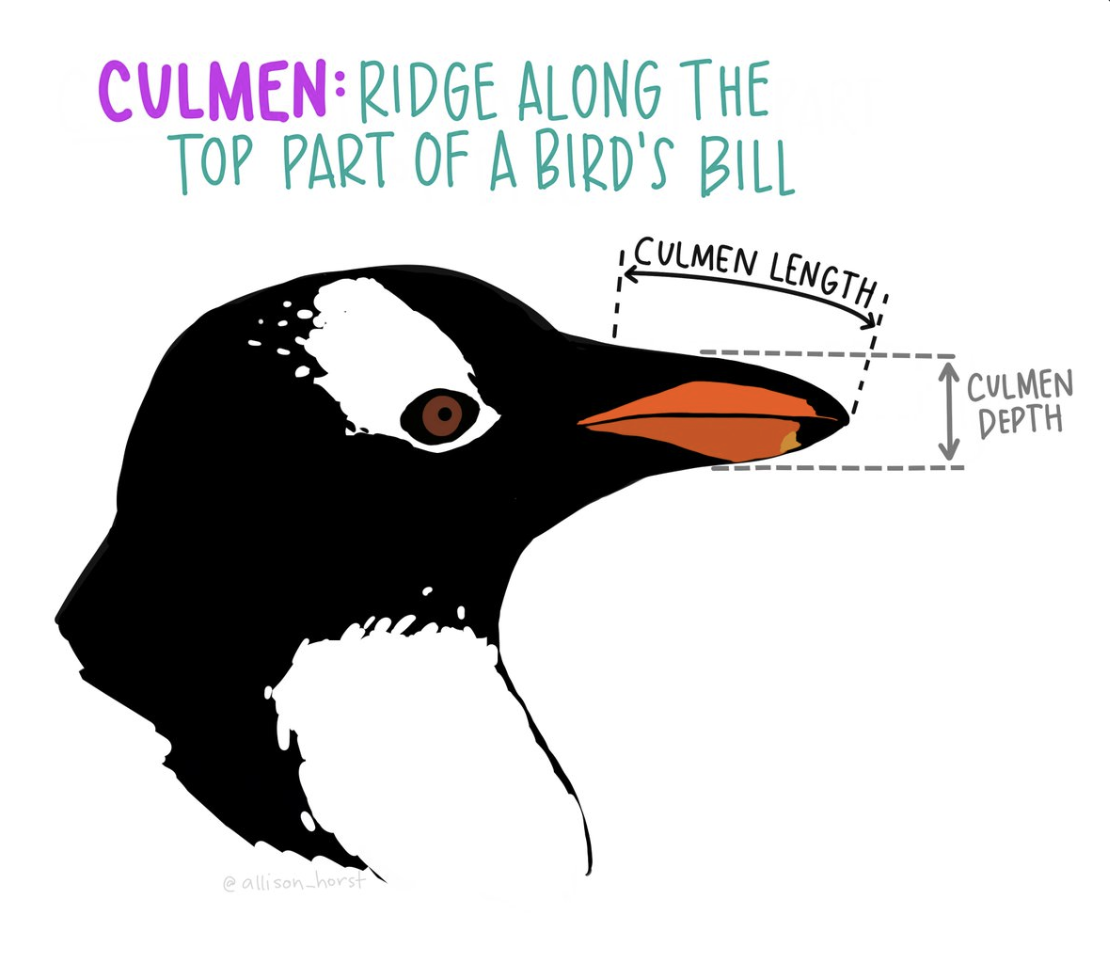

In [5]:
Image('images/penguin_culmen.png', width=700, height=550)

### What Is Flipper Measuring?

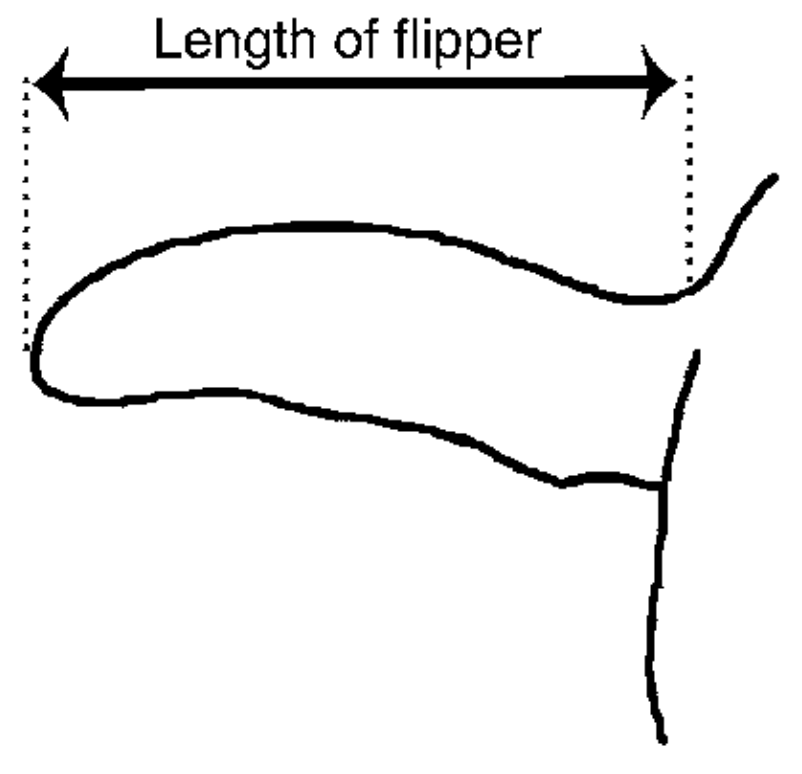

In [4]:
Image('images/flipper.png', width=500, height=450)

# Implementing K-Means Clustering

As you just learned, there are essentially two central sectors that power the K-Means algorithm.<br>
1. Calculating/re-calculating cluster centroids.
2. Assigning points to nearest centroid.

You then should tackle these two functionalities by at least implementing two separate functions or modules where each takes care of one of the steps above.<br>
Below are two general outlines of what your two basic functions should be doing:

```python
def update_centroids(cluster_assignment):
    # step 1--find each group of data points based on the cluster_assignment
    ...
    # step 2--calculate the centroids for each group
    ...
    return (centroid_1, centroid_2, ... centroid_x)
```
For the example above, the input variable `cluster_assignment` can be of any Python or Python-packaged data type that you see fit, such as numpy arrays, list of lists, and even just the same pandas dataframe. The output variable should be a collection of updated centroids, where you can use a list, a tuple, a numpy array, etc. as your collection data type.

```python
def assign_point_to_cluster(data_points, centroids):
    # step 1--find the nearest centroid to the first point, assign it to that cluster
    ...
    # step 2--repeat the operation for all points
    ...
    return cluster_assignment
```
For the example above, you should notice that since the K-Means clustering algorithm is an iterative procedure, the input variable `centroid` is the output of the `update_centroids` method and its output `cluster_assignment` in turn goes in as the input to `update_centroids`. The input variable `data_points` should remain unchanged throughout, so operation needs to be done on it. 

Since we are not restricting the data types for any of the input and output variables above, you have full autonomy to choose the data type that you are most comfortable with and that of which is efficient.

Below are little more detailed starter codes for some methods that can be incorporated into the two main functional branch that you should find helpful to your implementation.

In [ ]:
def calculate_squared_distance_pointwise(point_a, point_b):
    """
    Calculates and outputs the squared distance between point_a and point_b
    """
    ...
    return ...

def calculate_squared_distance(matrix, a_collection_of_points):
    """
    For each point in the matrix, calculate its squared distance to each of the point in a_collection_of_points
    Parameters:
        matrix--think of it as an array of arrays, where each point is represented as an array,
                so it is really just an array of points.
                Ex. [
                    [1,1],
                    [2,2],
                    [3,3]
                    ]
        a_collection_of_points--essentially another matrix
    
    Returns:
        square_distance_matrix--should have the same dimension as the input matrix
    """
    ...
    square_distance_matrix = ...
    ...
    return square_distance_matrix

Then putting these two funnctional units together, you should implement the following `run_KMeans` method to perform the actual K-Means clustering.

In [ ]:
def run_KMeans(data, K):
    """
    Once you finish the building blocks of KMeans, put it all together and call 
    them through this function. This would be your actual function for execution.

    Parameter:
        data: same input data you've been using elsewhere
        K: number of clusters K

    Returns:
        cluster_assignment: final cluster assignment the algorithm converges to
        centroids: final cluster centroids the algorithm converges to
    """
    # step 1--initialize K random points from data as your starting cnetroids
    ...
    # step 2--initialize/declare necessary variables
    num_iteration = ...
    cluster_assignment = ...
    ...
    # step 3--construct a loop that iteratively update the cluster assignments, then
    # the centroids, then the cluster assignments again, ...
    for iter in range(num_iteration):
        # update cluster assignment
        cluster_assignment = ...
        centroids = ...
        # optional--add a early stopping condition
        if ...:
            ...
    return cluster_assignment, centroids

## Visualizing K-Means Clusters

The plotting function below is provided to you if you would like to visualize the updated cluster assignment scatterplot either at each iteration of the algorithm or at the end. However notice that in order to use the provided method, you should align your input variables with the specified data types.

In [ ]:
import matplotlib.pyplot as plt

# please do not modify anything
def plot_current(data: np.ndarray, rank_matrix: np.ndarray, centroids: np.ndarray):
    row, col = np.shape(data)
    k = np.shape(centroids)[0]
    # color map encodings
    color_mat = np.matrix([[1,0,0],
                           [0,1,0],
                           [0,0,1],
                           [0,0,0],
                           [1,1,0],
                           [1,0,1],
                           [0,1,1]])
    # select only the first k color maps for the k clusters
    k_color_mat = color_mat[0:k]
    # data point color map
    color_vector = rank_matrix.dot(k_color_mat)
    # centroid color map
    mu_color_vector = np.eye(k).dot(k_color_mat)
    # scatter plot the data points
    plt.scatter(data[:,0], data[:,1], edgecolors = color_vector, marker = 'o', facecolors = 'none', alpha = 0.3)
    # scatter plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c = mu_color_vector, marker = 'D', s = 50)

# Assess Whether You've Chosen the Correct K

## Using Elbow Method

One of the ways you can perform a sanity check on whether you've selected the optimal `K` value is through the elbow method. Through it, you are essentially plotting the total within-cluster sum of squared distances as the `K` changes. The optimal value appears at point where the decreasing trend in within-cluster sum of squared distances change from exponential or quadratic decay to almost linear decay.<br>

Below is an image for demonstration.<br>
<img src='images/elbow_method_demo.png'><br>
Below are the starter codes that will guide you through the implementation of the elbow method. Once you successfully plotted the curves, you should observe then proceed (you are encouraged to also cross-reference this optimal K using Silhouette Analysis) with what you think would be the optimal `K`.

In [ ]:
def calculate_sum_of_squared_distances(centroids, rank_matrix, data):
    """
    Somewhat similar to the squared distance calculation you've implemented so far,
    this method sums up all squared distances between each point to the centroid it is 
    assigned to.

    Parameters:
        centroids: provide the same collection of centroids your K-Means algorithm converged to
        rank_matrix: provide the same cluster assignment matrix based on your final centroids
        data: same dataset
    """
    # declare this variable
    sum_squared_distance = ...
    for i in range(len(data)):
        # fill in other operations as needed
        ...
        # increment this sum with the point-wise squared distance between each point and its 
        # nearest centroid
        sum_squared_distance += ...
    return sum_squared_distance

Implement the block below to plot out how your `calculate_sum_of_squared_distances` would change across varying `K`.

In [ ]:
# variable declaration
distances = ...
K = ...
# construct a loop that computes a new total within-cluster sum of squared distances for a new K
# across a range of K values
for dummy in ...:
    # do something
    ...
plt.figure(figsize=(12, 8))
plt.plot(K, distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

If you are able to implement all above steps and see a plot that behave in a similar way as the demo picture, you can now make your own judgement of what may be the optimal `K` value that suits the dataset with the 2 features you picked and proceed with that `K`.

## Silhouette Analysis

When you see trouble with implementing the Elbow Method, or if you are finished with the implementation and are just curious, we've performed the whole Silhouette Analysis procedure in a separate script, which is another outstanding visualization and evalaution metric for the unsupervised K-Means clustering algorithm. Run the following cell and follow the prompt to see the results.

Some tips for understanding the plots yielded by Silhouette Analysis:
1. You should be looking for the optimal `K` (you may see competing candidates) that results in the highest average silhouette score (printed to you and plotted in red dashed verticle line).
2. You should be look for the optimal (or the few "best" candidates) `K` whose plot has all silhouette score blobs lying on the positive axis and far above the average silhouette score line.

If you see multiple possible best `K's` after following the above two tips, don't feel confused! For the very least you have narrowed your list to only a couple of options, you can just move forward with one of the `K's` and see how you final results play out. It is all about trial and error so no pressure at all!

For n_clusters = 2 The average silhouette_score is : 0.5726434594796348
For n_clusters = 3 The average silhouette_score is : 0.48501027345331904
For n_clusters = 4 The average silhouette_score is : 0.43631559454700286
For n_clusters = 5 The average silhouette_score is : 0.4033819335500162
For n_clusters = 6 The average silhouette_score is : 0.38211449003566683
For n_clusters = 7 The average silhouette_score is : 0.4504613940833261
For n_clusters = 8 The average silhouette_score is : 0.4410388697854166
For n_clusters = 9 The average silhouette_score is : 0.37420483714353636


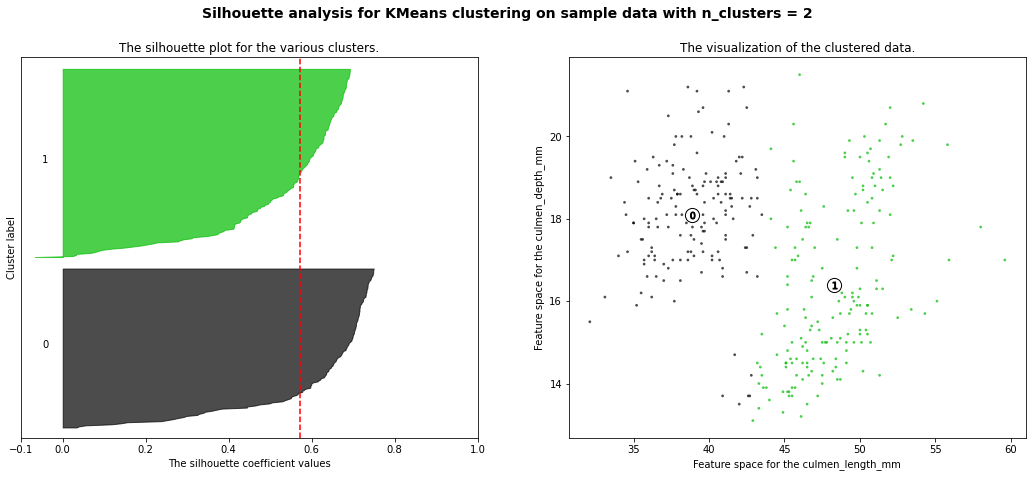

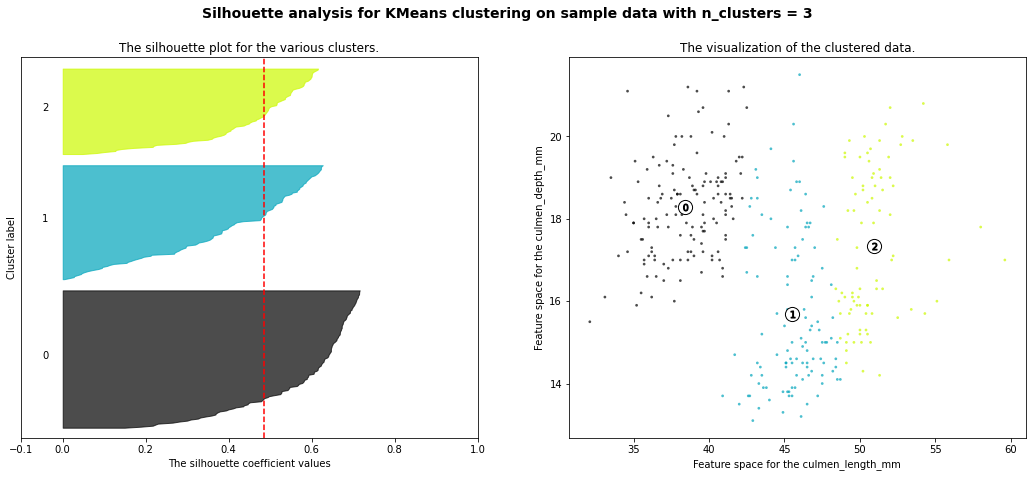

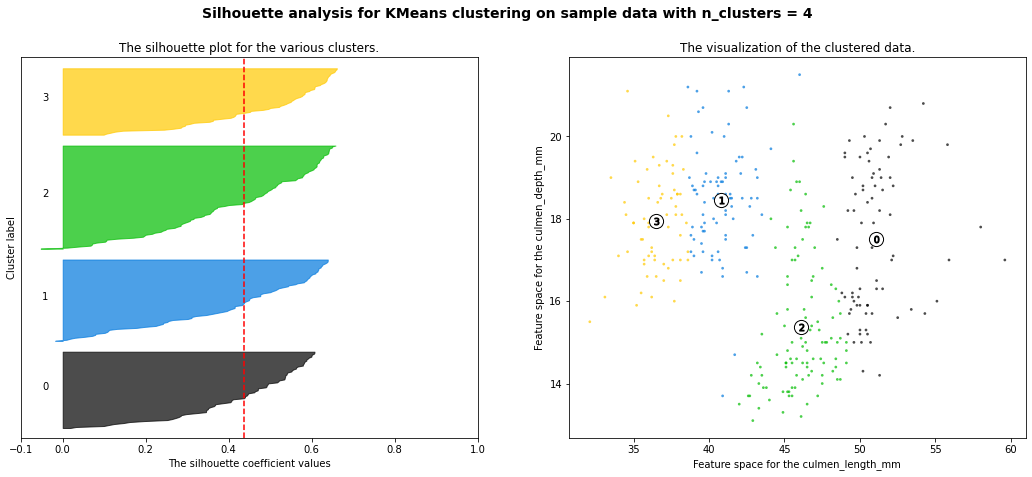

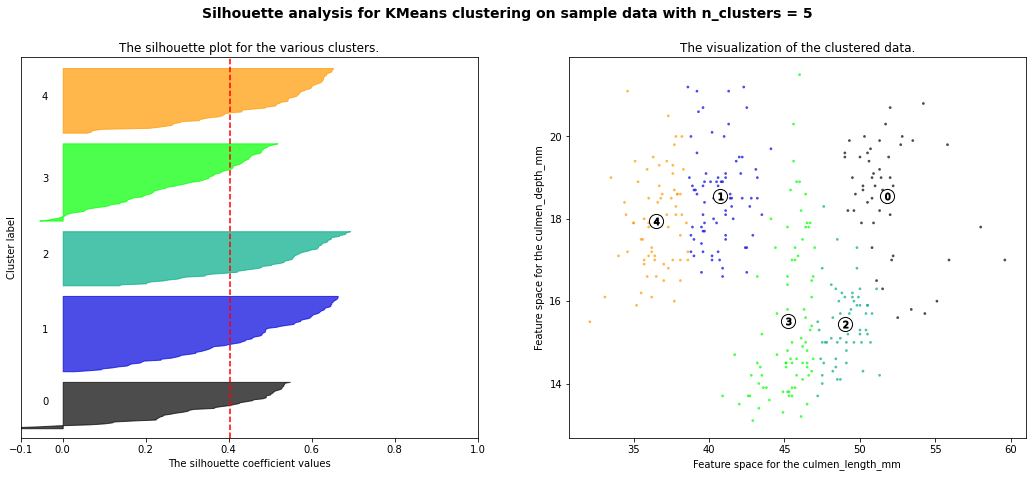

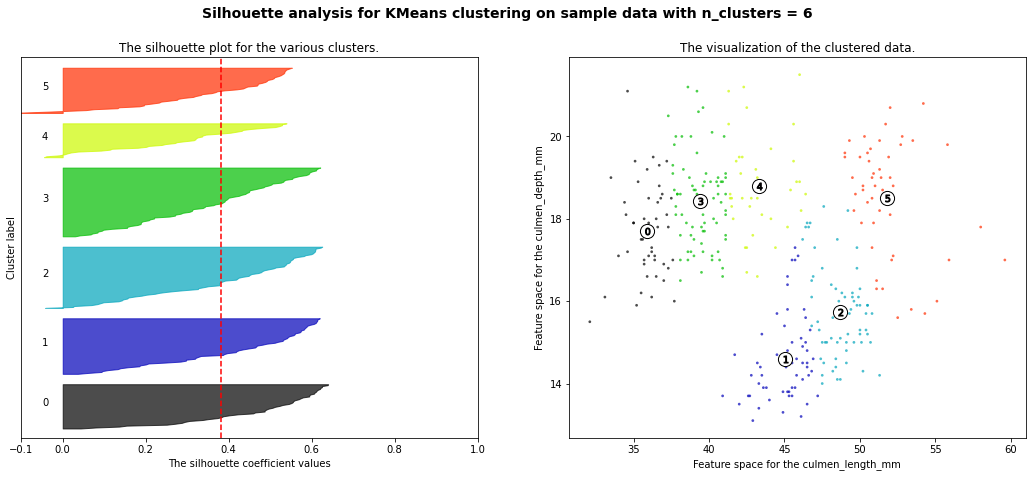

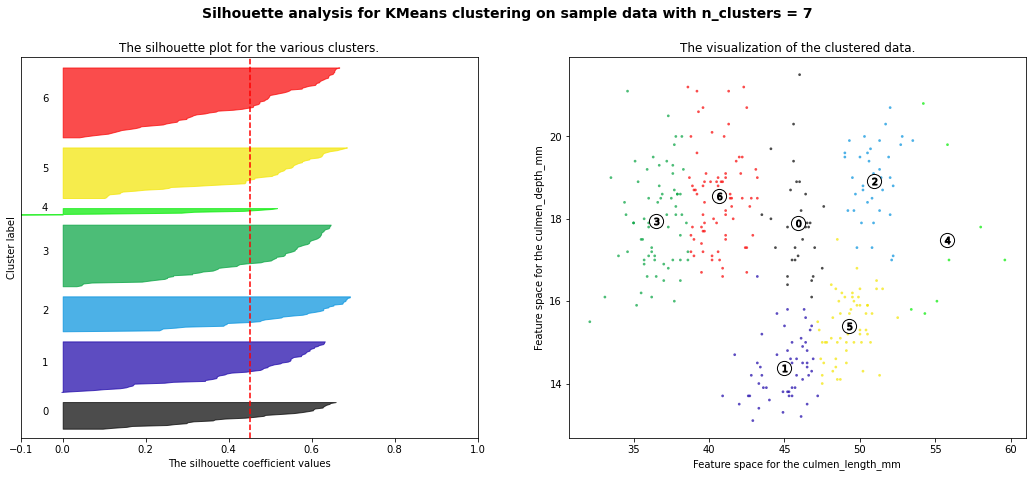

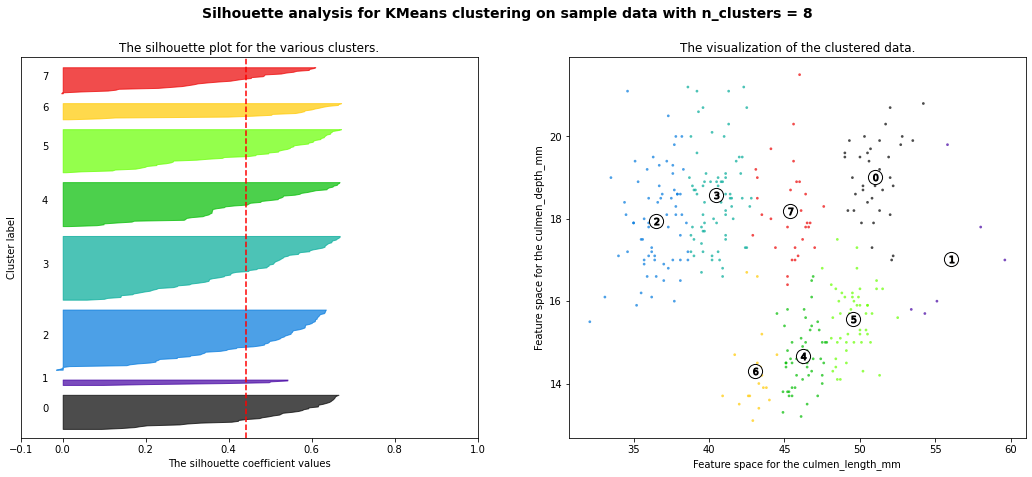

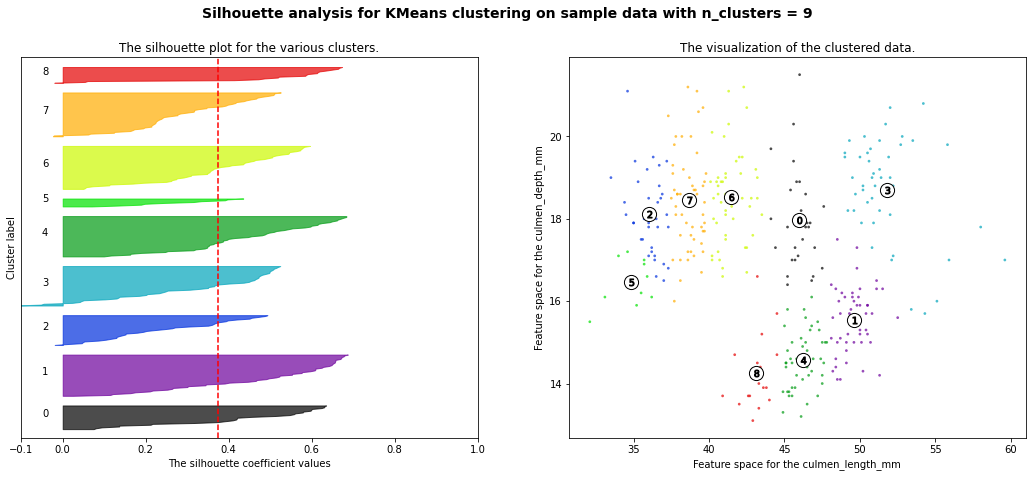

In [7]:
%run run_silhouette

# Find Your Optimal K and Test Your Clustering Result

Once you've made an educated selection (guess), you should now re-run your whole K-Means pipeline and calculate its resulting total within-cluster sum of squared distances. You are then ready to submit your result and see if you've completed this first step task of "Saving the Penguins" successfully!

**Note that at this point all necessary methods and functions that you need to carry out the operations in the above paragraph should already be implemented somewhere along the way. You should thoroughly review you work thus far to both double-check for any bugs and avoid redundant work.**

In [ ]:
# workspace if needed

When you are done, run the following cell, which will execute the testing script we wrote for you.

In [9]:
%run check_result

You may have failed to uncover enough species of penguines, try adjust your K; or it may just be bad luck due to randomness, try re-run your K-Means alogrithm and see if the result changes significantly
We expect your sum of within-cluster sum of squared distances obtained from running K-Means on this pair of features to be in the range: [2266.0775969547108, 2266.0775969547108]
